In [ ]:
# coding=utf-8
import jieba
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [1]:
# file path
filePath='/Users/youngmihuang/Downloads/corpus.txt'
fileSegWordDonePath ='corpusSegDone.txt'

# read the file by file
fileTrainRead = []
with open(filePath) as fileTrainRaw:
    for line in fileTrainRaw:
        fileTrainRead.append(line)

In [7]:
# define this function to print a list with Chinese
def PrintListChinese(list):
    for i in range(len(list)):
        print list[i],

# segment word with jieba
fileTrainSeg=[]
for i in range(len(fileTrainRead)):
    fileTrainSeg.append([' '.join(list(jieba.cut(fileTrainRead[i][9:-11],cut_all=False)))])
    if i % 50000 == 0 :
        print i

0
50000
100000
150000
200000
250000
300000
350000
400000
450000
500000
550000
600000
650000
700000
750000
800000
850000
900000
950000
1000000
1050000
1100000
1150000
1200000
1250000
1300000
1350000
1400000


In [8]:
# save the result
with open(fileSegWordDonePath,'wb') as fW:
    for i in range(len(fileTrainSeg)):
        fW.write(fileTrainSeg[i][0].encode('utf-8'))
        fW.write('\n')

In [9]:
# jieba seg words transform to word2vec
import word2vec
word2vec.word2vec('corpusSegDone.txt', 'corpusWord2Vec.bin', size=300,verbose=True)

Starting training using file corpusSegDone.txt
Vocab size: 507882
Words in train file: 391829209


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [10]:
# define this function to print a list with Chinese
def PrintListChinese(list):
    for i in range(len(list)):
        print list[i],
# to test the segment result
PrintListChinese(fileTrainSeg[10])

２ ０ １ ２ 年 东风 标致 小桔灯 乡村 小学 图书馆 计划 于 ６ 月 ２ ３ 日 － ２ ９ 日 在 湖北省 武汉市 新洲区 凤凰 镇 郭岗 小学 举行 ， 来自 全国 各地 的 ７ 名 志愿者 带 着 东风 标致 ５ ０ ８ 汽车 捐赠 的 ２ ０ ０ ０ 本 新书 ， 建立 起有 一所 “ 小桔灯 乡村 小学 图书馆 ” 。 Ｎ 浜 菏行 轮耷 不仅 是 革命 老区 ， 也 是 全国 有名 的 建筑 之 乡 ； 这里 的 人 大部分 都 外出 从事 建筑业 ， 导致 这里 的 留守 儿童 比例 其高 。 郭岗 小学 现有 学生 １ ３ ６ 名 （ 含 教学点 一处 ） ， 其中 住校 学生 ９ ８ 名 ， 全校 ９ ０ ％ 左右 的 学生 都 是 留守 儿童 。 Ｔ 诨 疃 举行 之前 ， 学校 图书室 里 摆满 了 陈旧 的 教科书 ， 这里 的 学生 在 课外 时间 没有 课外书 可以 阅读 ； 在 志愿者 问 学生 喜欢 读 什么 书 的 时候 ， 大部分 孩子 的 回答 是 “ 童话 书 ” ， 当 再 问 他们 还 喜欢 什么 图书 的 时候 ， 孩子 迷茫 的 眼神 让 我们 明白 由于 没有 接触 过 课外书 ， 很多 孩子 不 知道 除了 童话 书 以外 还有 什么 类别 的 书 可以 阅读 。 Ｎ 了 改变 这一 现状 ， 此次 活动 捐赠 的 图书 涵盖 了 童话 、 中外 文学 、 传统 文学 、 注音版 和 绘画板 少儿读物 等 ； 学校 郭 校长 也 承诺 会 在 每天 的 晚自习 时 对 全校学生 开放 阅读 和 借书 。 ４ 舜位 疃 也 得到 了 文化 、 经济 各界 名人 的 支持 ， 包括 陈丹青 、 邓康延 、 洪晃 、 陆琪 、 蒋方舟 、 饶雪漫 、 沈颢 、 沈南鹏 、 田 立新 、 熊焰 、 张琼 ， 都 为 乡村 儿童 推荐 了 他们 认为 应该 阅读 的 图书 ； 我们 也 在 东风 标致 ５ ０ ８ 汽车 的 支持 下 ， 在 捐赠 的 ２ ０ ０ ０ 本书 之外 购买 了 上述 人士 推荐 的 图书 ， 作为 额外 的 补充 捐赠 给 学校 。 Ｔ 谝 恢 芑 疃 的 结束 时 ， 志愿者 们 为 孩子 们 安排 了 别开生面 的 表演 ， 帮助 孩子 们 展示 一周 以来 通过 阅读 图书 所 编排

In [134]:
# see the word2vector
model = word2vec.load('corpusWord2Vec.bin')
print (model.vectors)

[[ 0.08015626  0.08850129 -0.07670335 ..., -0.02626957 -0.03316621
   0.0614953 ]
 [ 0.02490776  0.0284044  -0.00748435 ...,  0.05767063 -0.02724481
  -0.00038052]
 [ 0.0169119   0.07222425  0.00237306 ...,  0.00835561 -0.05871668
   0.03644887]
 ..., 
 [-0.058289    0.00059962 -0.10534889 ...,  0.02184633  0.03019233
  -0.03207616]
 [-0.01173411  0.03515942 -0.13313138 ...,  0.11499783  0.00740608
  -0.01479459]
 [ 0.0247834   0.03234984  0.02735695 ..., -0.01815953  0.00259401
   0.01964147]]


In [135]:
# see the example of vocabulary from 1001 to 1010
for i in range(1000,1010):
    print (model.vocab[i])

德国
微博
行
金
训练
融资
下滑
加大
属于
出台


In [136]:
# check correlation of the specific word
indexes = model.cosine(u'台湾')
for index in indexes[0]:
    print (model.vocab[index])

大陆
台南
高雄
香港
花莲
澎湖
岛内
日本
台湾地区
两岸


In [137]:
indexes = model.cosine(u'宝宝')
for index in indexes[0]:
    print (model.vocab[index])

小宝宝
孩子
准妈妈
小孩子
小孩
小朋友
小宝贝
妈咪
爸爸妈妈
妈妈


In [138]:
indexes = model.cosine(u'打车')
for index in indexes[0]:
    print (model.vocab[index])

坐车
坐地铁
坐火车
买票
转车
开车
乘车
乘火车
赶车
问路


In [139]:
indexes = model.cosine(u'杨幂')
for index in indexes[0]:
    print (model.vocab[index])

冯绍峰
刘恺威
赵文卓
林心如
邓超
高圆圆
姚晨
张柏芝
秦岚
杜淳


In [140]:
indexes = model.cosine(u'腾讯')
for index in indexes[0]:
    print (model.vocab[index])

网易
新浪
搜狗
优酷
百度
百视通
凡客
阿里巴巴
开放平台
走秀网


In [141]:
# load the word2vec model
rawWordVec = model.vectors
 
# reduce the dimension of word vector
X_reduced = PCA(n_components=2).fit_transform(rawWordVec)
 
# show some word(center word) and it's similar words
index1,metrics1 = model.cosine(u'台湾')
index2,metrics2 = model.cosine(u'宝宝')
index3,metrics3 = model.cosine(u'打车')
index4,metrics4 = model.cosine(u'杨幂')
index5,metrics5 = model.cosine(u'腾讯')
 
# add the index of center word 
index01=np.where(model.vocab==u'台湾')
index02=np.where(model.vocab==u'宝宝')
index03=np.where(model.vocab==u'打车')
index04=np.where(model.vocab==u'杨幂')
index05=np.where(model.vocab==u'腾讯')
 
index1=np.append(index1,index01)
index2=np.append(index2,index03)
index3=np.append(index3,index03)
index4=np.append(index4,index04)
index5=np.append(index5,index05)
 

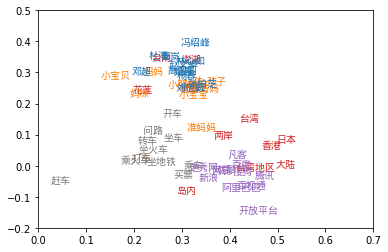

In [142]:
# plot the result
zhfont = matplotlib.font_manager.FontProperties(fname='/Users/youngmihuang/Downloads/wqy-microhei.ttc')
fig = plt.figure()
ax = fig.add_subplot(111)
 
for i in index1:
    ax.text(X_reduced[i][0],X_reduced[i][1], model.vocab[i], fontproperties=zhfont,color='C3')

for i in index2:
    ax.text(X_reduced[i][0],X_reduced[i][1], model.vocab[i], fontproperties=zhfont,color='C1')

for i in index3:
    ax.text(X_reduced[i][0],X_reduced[i][1], model.vocab[i], fontproperties=zhfont,color='C7')

for i in index4:
    ax.text(X_reduced[i][0],X_reduced[i][1], model.vocab[i], fontproperties=zhfont,color='C0')

for i in index5:
    ax.text(X_reduced[i][0],X_reduced[i][1], model.vocab[i], fontproperties=zhfont,color='C4')

ax.axis([0,0.7, -0.2,0.5])
plt.figure(figsize=(50,50))
plt.show()